In [72]:
from rsi import RSI_strategy
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
df = yf.download(tickers = "DOGE-USD", start = "2023-12-01", end = "2023-12-14", interval = "1h")

[*********************100%***********************]  1 of 1 completed


In [74]:
print('RSI Strategy Dogecoin')

model = RSI_strategy(df)

RSI Strategy Dogecoin


In [75]:
model.data.tail()

,Open,High,Low,Close,Adj Close,Volume
2023-12-13 19:00:00,0.093127,0.095102,0.093127,0.094955,0.094955,29780672
2023-12-13 20:00:00,0.094958,0.095742,0.094863,0.095733,0.095733,16974016
2023-12-13 21:00:00,0.095757,0.096257,0.095526,0.096246,0.096246,1661184
2023-12-13 22:00:00,0.096251,0.097382,0.096251,0.096611,0.096611,27535168
2023-12-13 23:00:00,0.096586,0.097044,0.096294,0.096428,0.096428,0


In [76]:
model.get_signals()

In [77]:
model.data.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,Position
2023-12-13 19:00:00,0.093127,0.095102,0.093127,0.094955,0.094955,29780672,67.421009,1
2023-12-13 20:00:00,0.094958,0.095742,0.094863,0.095733,0.095733,16974016,81.460651,-1
2023-12-13 21:00:00,0.095757,0.096257,0.095526,0.096246,0.096246,1661184,80.388784,-1
2023-12-13 22:00:00,0.096251,0.097382,0.096251,0.096611,0.096611,27535168,79.870380,-1
2023-12-13 23:00:00,0.096586,0.097044,0.096294,0.096428,0.096428,0,75.733756,-1


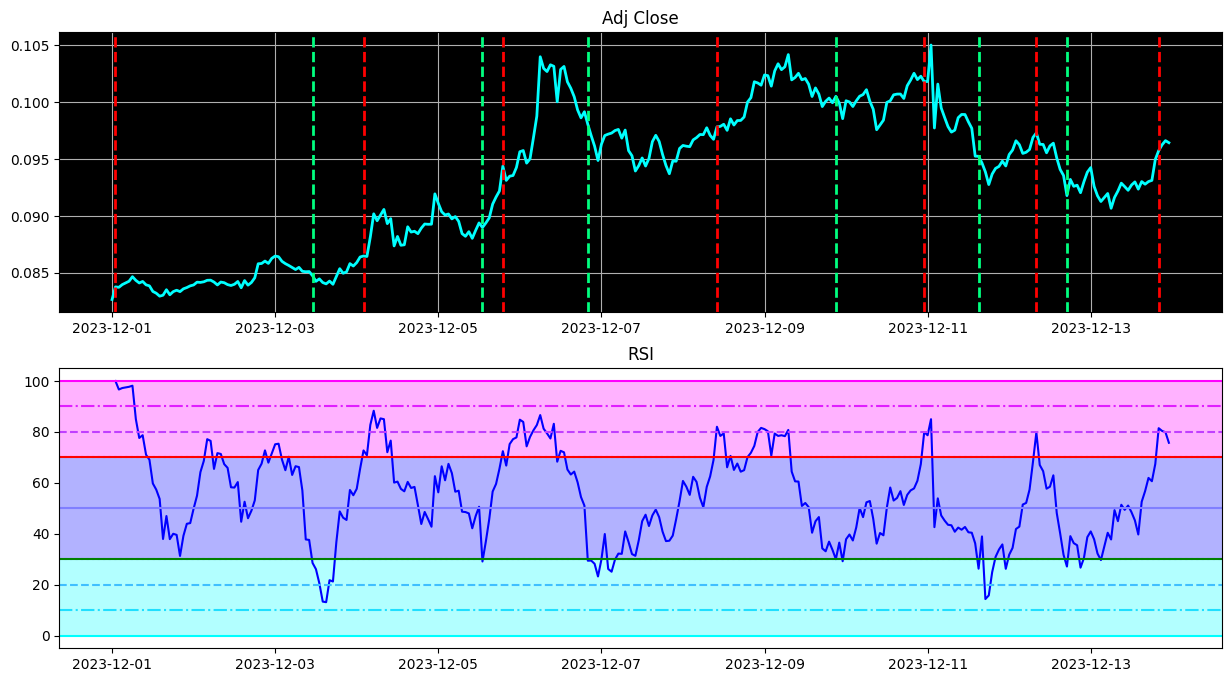

In [78]:
model.plot()

In [79]:
bfh = model.calibrate()
print(model.buy_threshold, model.sell_threshold, model.window)

35 75 30


In [80]:
fin_pr, history = model.run_rsi(return_history=True)

In [81]:
history

,Open,High,Low,Close,Adj Close,Volume,RSI,Position,PnL,Cumulative PnL,Wealth
2023-12-01 00:00:00,0.083414,0.083487,0.082621,0.082663,0.082663,0,NaN,0,NaN,NaN,NaN
2023-12-01 01:00:00,0.082664,0.083774,0.082504,0.083774,0.083774,213952,100.000000,-1,0.000000,0.000000,1000.000000
2023-12-01 02:00:00,0.083795,0.083878,0.083557,0.083736,0.083736,0,96.663471,-1,0.000458,0.000458,1000.000458
2023-12-01 03:00:00,0.083729,0.083974,0.083569,0.083974,0.083974,8422784,97.235909,-1,-0.002844,-0.002386,999.997614
2023-12-01 04:00:00,0.083971,0.084190,0.083938,0.084120,0.084120,7011136,97.499429,-1,-0.001742,-0.004128,999.995872
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-13 19:00:00,0.093127,0.095102,0.093127,0.094955,0.094955,29780672,67.421009,1,0.019662,0.156984,1000.156984
2023-12-13 20:00:00,0.094958,0.095742,0.094863,0.095733,0.095733,16974016,81.460651,-1,0.008195,0.165179,1000.165179
2023-12-13 21:00:00,0.095757,0.096257,0.095526,0.096246,0.096246,1661184,80.388784,-1,-0.005357,0.159822,1000.159822
2023-12-13 22:00:00,0.096251,0.097382,0.096251,0.096611,0.096611,27535168,79.870380,-1,-0.003791,0.156031,1000.156031


In [64]:
print(f"Final Wealth: {history.Wealth.iloc[-1]}")
print("ROI:", history.Wealth.iloc[-1] / 1000 * 100, '%')
print(f"Profit: {history.Wealth.iloc[-1] - 1000} $")

Final Wealth: 1000.1579248271354
ROI: 100.01579248271352 %
Profit: 0.15792482713538902 $


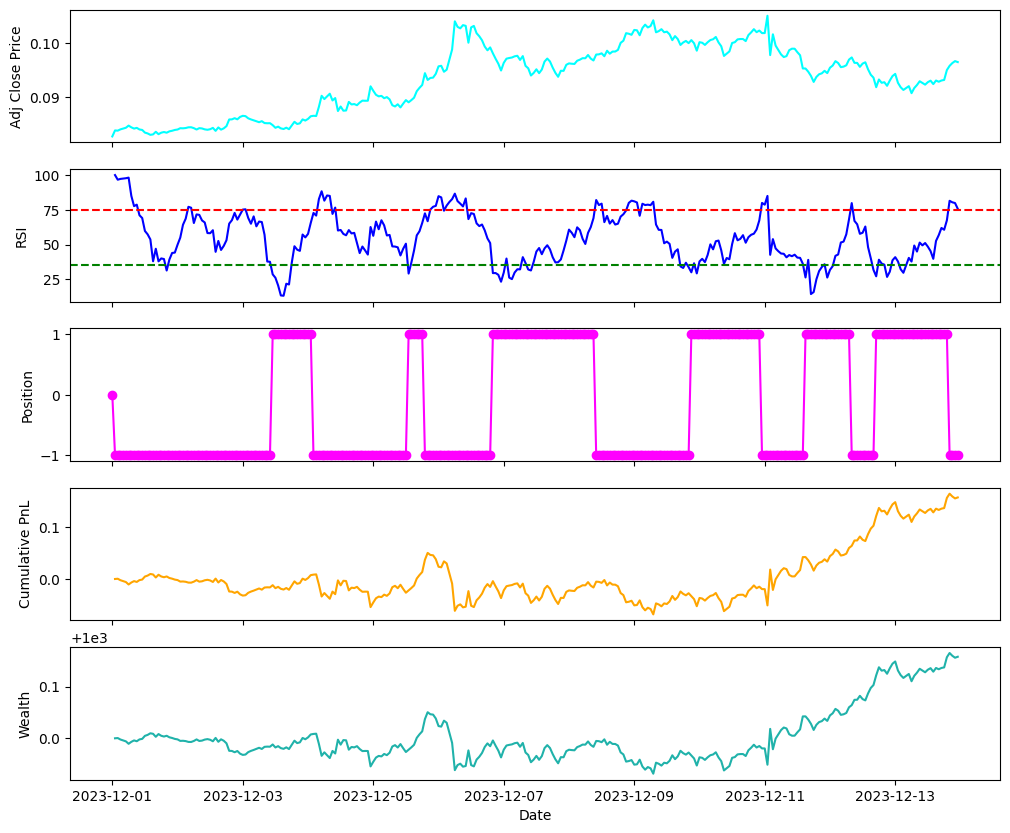

In [65]:
model.plot_history(history=history)

In [66]:
realized_drawdown, unrealized_drawdown = model.calculate_drawdown(history.dropna())
print(realized_drawdown, unrealized_drawdown)

-0.052751351633532506 0.10881222423593351


Frequency of Profitable Signals: 53.85%


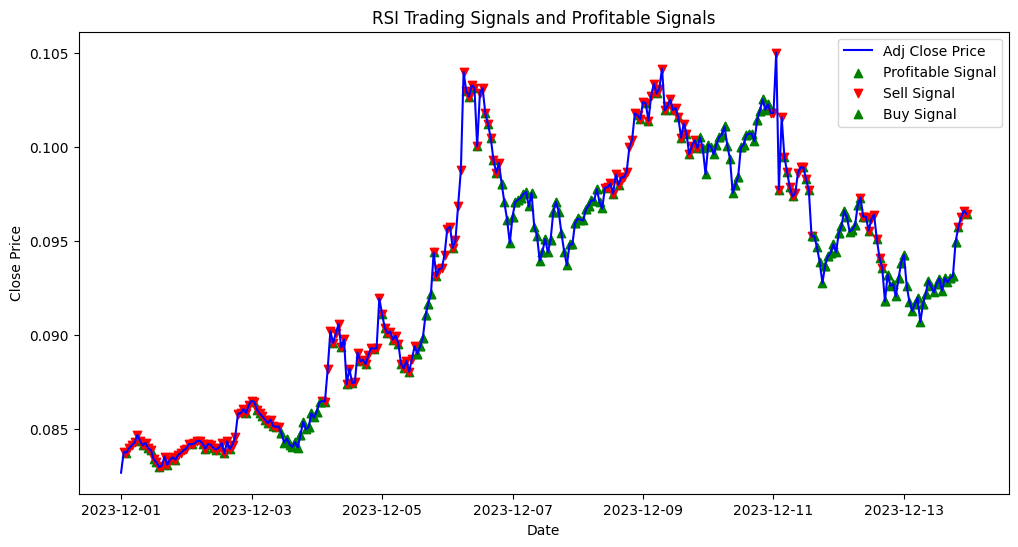

In [67]:
model.profitable_signals(history=history)

In [87]:
# testing

train = yf.download(tickers = "DOGE-USD", start = "2022-01-01", end = "2022-12-31", interval = "1h")
test = yf.download(tickers = "DOGE-USD", start = "2023-01-01", end = "2023-12-01", interval = "1h")

train_model = RSI_strategy(train)
train_model.get_signals()
bfh_train = model.calibrate()
print(train_model.buy_threshold, train_model.sell_threshold, train_model.window)

fin_pr_train, history_train = train_model.run_rsi(return_history=True)

print(f"Train Final Wealth: {history_train.Wealth.iloc[-1]}")
print("Train ROI:", history_train.Wealth.iloc[-1] / 1000 * 100, '%')
print(f"Train Profit: {history_train.Wealth.iloc[-1] - 1000} $")


test_model = RSI_strategy(test, buy_threshold=train_model.buy_threshold, 
                          sell_threshold=train_model.sell_threshold,
                          window=train_model.window
                           )
test_model.get_signals()
fin_pr_test, history_test = test_model.run_rsi(return_history=True)
print(f"Test Final Wealth: {history_test.Wealth.iloc[-1]}")
print("Test ROI:", history_test.Wealth.iloc[-1] / 1000 * 100, '%')
print(f"Test Profit: {history_test.Wealth.iloc[-1] - 1000} $")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
30 70 14
Train Final Wealth: 999.6464371471264
Train ROI: 99.96464371471264 %
Train Profit: -0.3535628528735515 $
Test Final Wealth: 1000.0378323453534
Test ROI: 100.00378323453533 %
Test Profit: 0.03783234535342217 $
